In [65]:
import pandas as pd
import numpy as np

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
pd.options.mode.chained_assignment = None  # default='warn'
from scipy import stats
import statsmodels.api as sm

In [67]:
 df = pd.read_excel('report_2023_5_20.xlsx.XLSX')

In [68]:
#Удаляем строки с нулевым значением суммы заказов 

df[df['Сумма заказов минус комиссия WB, руб.'] != 0]

,Бренд,Неделя года,День,Артикул продавца,"Поступления, шт.","Выкупили, шт.","К перечислению за товар, руб.","Заказано, шт.","Сумма заказов минус комиссия WB, руб.",Себестоимость
0,In Belts We Trust,8,2023-02-24,Золотистый прямоугольник,0,0,0.00,1,400.40,380
2,In Belts We Trust,8,2023-02-24,Черный эла,0,1,188.65,1,188.65,70
4,In Belts We Trust,8,2023-02-25,Серебряный прямоугольник,0,1,400.40,1,400.40,380
5,In Belts We Trust,8,2023-02-25,Синий эла,0,0,0.00,1,188.65,70
6,In Belts We Trust,8,2023-02-25,Эластичный ремень,0,0,0.00,1,188.65,70
...,...,...,...,...,...,...,...,...,...,...
501,In Belts We Trust,20,2023-05-16,Белый с люверсами,0,1,266.64,1,225.09,100
502,In Belts We Trust,20,2023-05-16,Два ряда дырок,0,0,0.00,1,282.17,120
503,In Belts We Trust,20,2023-05-16,Классика эко,0,0,0.00,1,263.41,100
504,In Belts We Trust,20,2023-05-16,Прозрачный с люверсами,0,1,284.75,2,525.12,130


In [69]:
#Добавляем 23% к сумме заказов. Это коммиссия, которую вб убрал

df.reset_index(drop= True , inplace= True)
df['Сумма заказов минус комиссия WB, руб.'] = df['Сумма заказов минус комиссия WB, руб.'] + (df['Сумма заказов минус комиссия WB, руб.']) * 0.23

In [70]:
#Определяем Цену

df['Цена'] = round(df['Сумма заказов минус комиссия WB, руб.'] / df['Заказано, шт.'], 0)

In [71]:
#Определяем Прибыль

df['Прибыль'] = (df['Сумма заказов минус комиссия WB, руб.'] * 0.94 - df['Себестоимость'] * df['Заказано, шт.'] - 20 * df['Заказано, шт.'])

In [72]:
df

,Бренд,Неделя года,День,Артикул продавца,"Поступления, шт.","Выкупили, шт.","К перечислению за товар, руб.","Заказано, шт.","Сумма заказов минус комиссия WB, руб.",Себестоимость,Цена,Прибыль
0,In Belts We Trust,8,2023-02-24,Золотистый прямоугольник,0,0,0.00,1,492.4920,380,492.0,62.94248
1,In Belts We Trust,8,2023-02-24,Синий эла,0,1,161.70,0,0.0000,70,NaN,0.00000
2,In Belts We Trust,8,2023-02-24,Черный эла,0,1,188.65,1,232.0395,70,232.0,128.11713
3,In Belts We Trust,8,2023-02-25,Серебряный круглый,0,3,1201.20,0,0.0000,380,NaN,0.00000
4,In Belts We Trust,8,2023-02-25,Серебряный прямоугольник,0,1,400.40,1,492.4920,380,492.0,62.94248
...,...,...,...,...,...,...,...,...,...,...,...,...
534,In Belts We Trust,20,2023-05-19,Овальная пряжка,0,1,276.34,0,0.0000,150,NaN,0.00000
535,In Belts We Trust,20,2023-05-19,Прозрачный с люверсами,0,5,1420.65,2,0.0000,130,0.0,-300.00000
536,In Belts We Trust,20,2023-05-19,"Пряжка ""Вдетый круг""",0,0,0.00,1,0.0000,100,0.0,-120.00000
537,In Belts We Trust,20,2023-05-19,Ремень тонкий,0,1,253.33,0,0.0000,100,NaN,0.00000


In [73]:
# Для рассчета прибыли я использую поле'Сумма заказов минус комиссия WB, руб.' и заказы, а не 'к перечислению за товар' и 
# выкупы, что было бы точнее. Если я буду использовать 'к перечислению за товар' и выкупы, то я не смогу узнать 
# первоначальную цену (так как я не смогу просто прибавть коммиссию к перечисленному за товар, я должна буду прибавить еще 
#                      какие-то нюансы, про которые я не знаю. Я до сих пор не знаю почему сумма заказов и перечисление за товар
#                     чуть-чуть разные). Таким образом я точно знаю цену и примерную прибыль (почти правду)
# На основании этого делаю регрессию. Альтернативой было бы знать точную прибыль и примерную цену, но мне знать цену важнее. 

In [74]:
dfBlackEla = df[(df['Артикул продавца'] == 'Черный эла') & (df['Цена'] != 0)]

In [75]:
tableBlackEla = pd.pivot_table(dfBlackEla, values=['Заказано, шт.', 'Прибыль'], index=['Цена'], aggfunc=np.sum)

In [76]:
indexes = tableBlackEla.index.values
tableBlackEla['Цена'] = indexes

In [77]:
tableBlackEla

,"Заказано, шт.",Прибыль,Цена
Цена,,,
192.0,3,270.407880,192.0
202.0,4,398.467200,202.0
217.0,2,227.491128,217.0
224.0,1,120.428400,224.0
228.0,1,124.475100,228.0
232.0,12,1537.405560,232.0
234.0,3,388.802760,234.0
237.0,10,1325.685000,237.0
238.0,3,400.133520,238.0


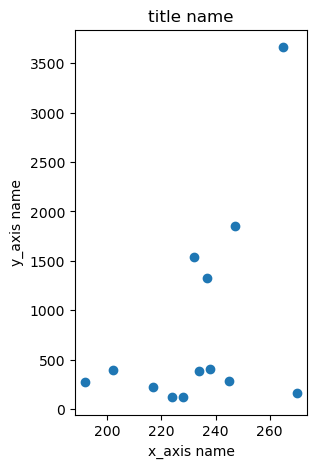

In [79]:
#График соотношения прибыли от цены 
x_axis = tableBlackEla['Цена']
y_axis = tableBlackEla['Прибыль']

plt.plot(x_axis, y_axis, 'o')
plt.title('title name')
plt.xlabel('x_axis name')
plt.ylabel('y_axis name')

plt.rc('figure', figsize=(3, 5))
plt.show()

In [80]:
x = x_axis.array
y = y_axis.array
ymax = max(y_axis.array)
xpos = np.where(y == ymax)
xmax = x[xpos]
print(xmax)

<PandasArray>
[265.0]
Length: 1, dtype: float64


In [81]:
stats.pearsonr(np.array(tableBlackEla['Цена']), np.array(tableBlackEla['Прибыль']))

PearsonRResult(statistic=0.47152209077783075, pvalue=0.10381759609207289)

b0: -4347.32852337194 b1 22.192464375399275
y = -4347.33 + 22.19 * x


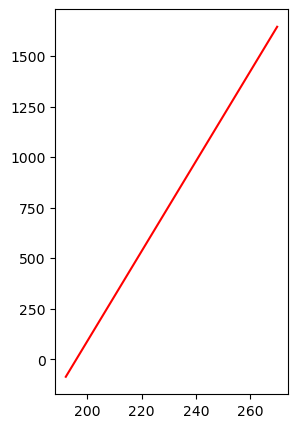

In [82]:
# H0: b1 = 0
# H1: b1 != 0
alpha = 0.05

df = len(y_axis) - 2
X_mean = np.mean(x_axis)
Y_mean = np.mean(y_axis)

corr = np.sum((x_axis - X_mean) * (y_axis - Y_mean)) / (np.sum((x_axis - X_mean) ** 2) * np.sum((y_axis - Y_mean) ** 2)) ** 0.5

X_sd = np.std(x_axis)
Y_sd = np.std(y_axis)

b1 = (Y_sd / X_sd) * corr

b0 = Y_mean - b1 * X_mean
print('b0:', b0, 'b1', b1)
print(f'y = {b0:.2f} + {b1:.2f} * x')
plt.plot(x_axis, b0 + b1 * x_axis, color='red')
plt.show()

<AxesSubplot:xlabel='Цена', ylabel='Прибыль'>

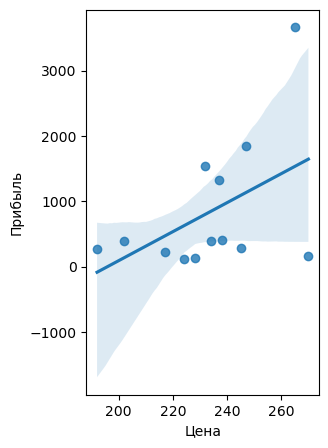

In [83]:
sns.regplot(x="Цена", y="Прибыль", data=tableBlackEla)

In [84]:
s2 = np.sum((y_axis - (b0 + b1 * x_axis)) ** 2) / (df) # оценка нормального распределения остатков
se = (s2 / (sum((x_axis - X_mean) ** 2))) ** 0.5
print('se: ', se)

t_value = b1 / se
p_value = 2 * (1 - st.t.cdf(abs(t_value), df))
print('p_value:', p_value)
if p_value > alpha:
    print(f'p_value > alpha. Do not reject H0. YOU CAN NOT USE REGRETION')
else:
    print(f'p_value < alpha. Reject H0. YOU CAN USE REGRETION')

se:  12.51422493278888
p_value: 0.10381759609207286
p_value > alpha. Do not reject H0. YOU CAN NOT USE REGRETION


In [85]:
# defining the variables
# x = x_axis.tolist()
# y = y_axis.tolist()
 
# # adding the constant term
# x = sm.add_constant(x)
 
# # performing the regression
# # and fitting the model
# result = sm.OLS(y, x).fit()
 
# # printing the summary table
# print(result.summary())

#Prob (Omnibus) - это статистический тест, измеряющий вероятность нормального распределения остатков. 
#Значение 1 означает совершенно нормальное распределение.
#Skew (Перекос) - это мера симметрии распределения остатков, где 0 означает идеальную симметрию.


In [87]:
give_me_x = int(input("give_me_x = "))
print("y = ", b0 + b1 * give_me_x)

give_me_x = 265
y =  1533.6745361088679
